In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from IPython.display import clear_output


import sys
sys.path.insert(1, '../python_library')
import pyram as pr

import shutil

In [23]:
pr.charge_lib('RRUFF')
lib_names = list(pr.lib().keys())

Charging pure spectra library, needs around a minute ....
Done. Good work!


# Selection using the mean of the signal

## Chose the right trashold on the mean

Mean of all means:  0.013011977744343843
Mean of all std:  0.025936962432306906


Text(0, 0.5, 'delta_nu')

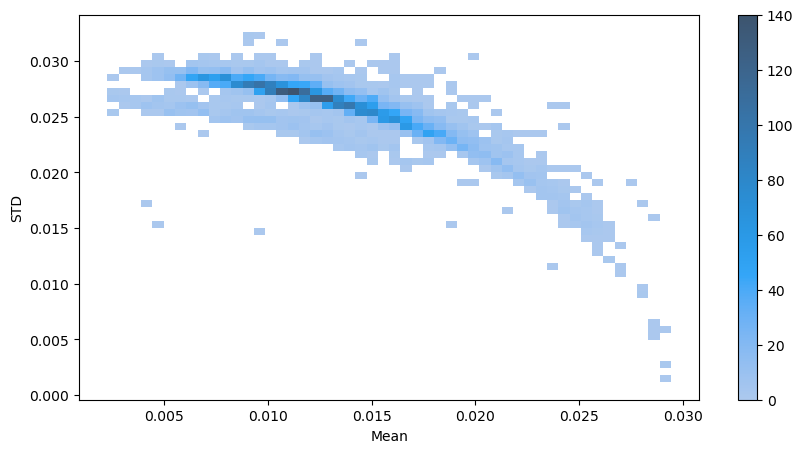

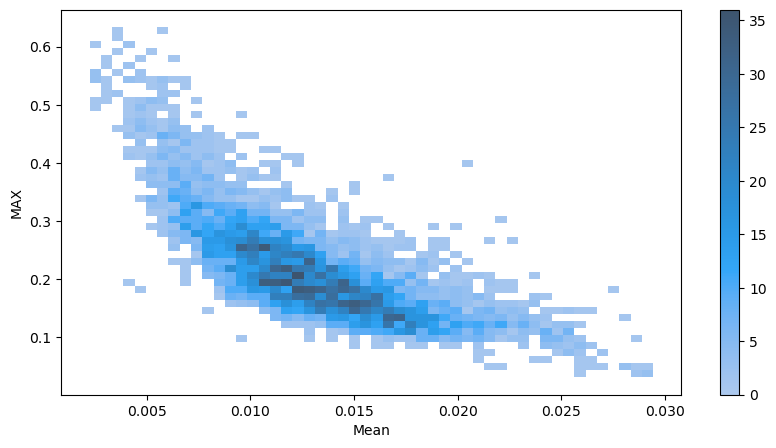

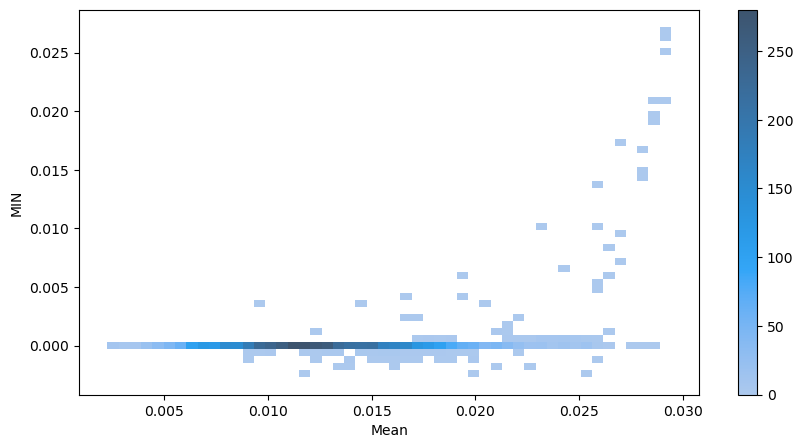

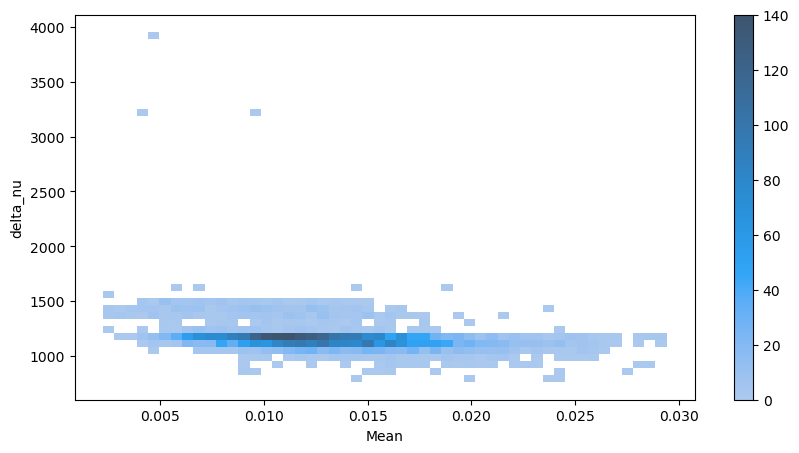

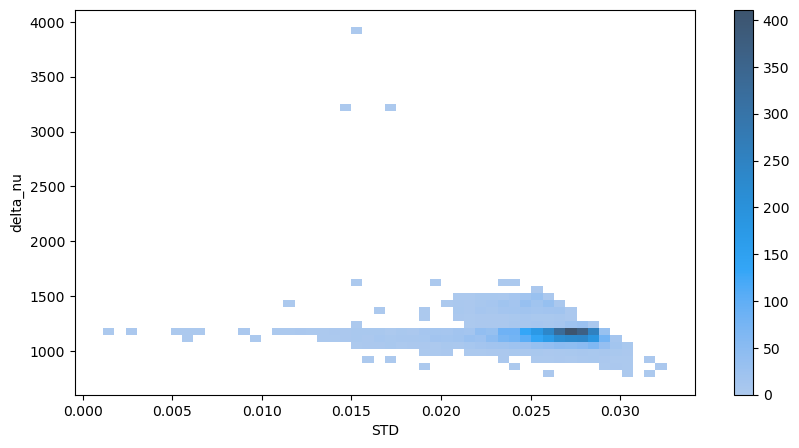

In [29]:
#############################################
t = 2.7
delta = 0.01
#############################################

MEAN = []
STD = []
MAX = []
MIN = []
STD_0 = []
delta_nu = []

for i in enumerate(lib_names):

    S = np.copy(pr.lib()[i[1]])
    S[1] = S[1]/(np.sqrt((S[1]**2).sum())) # normalize to unit vector/area

    MEAN.append(S[1].mean()) # mean
    STD.append(S[1].std()) # std
    MAX.append(S[1].max()) # max
    MIN.append(S[1].min()) # min
    delta_nu.append(S[0][-1]-S[0][0]) # delta nu

print('Mean of all means: ', np.mean(MEAN))
print('Mean of all std: ', np.mean(STD))

# plot
plt.figure(figsize=(10,5))
sns.histplot(x=MEAN,y=STD, cbar=True, bins=50)
plt.xlabel('Mean')
plt.ylabel('STD')

plt.figure(figsize=(10,5))
# plot
sns.histplot(x=MEAN,y=MAX, cbar=True, bins=50)
plt.xlabel('Mean')
plt.ylabel('MAX')

# plot
plt.figure(figsize=(10,5))
sns.histplot(x=MEAN,y=MIN, cbar=True, bins=50)
plt.xlabel('Mean')
plt.ylabel('MIN')

# plot
plt.figure(figsize=(10,5))
sns.histplot(x=MEAN,y=delta_nu, cbar=True, bins=50)
plt.xlabel('Mean')
plt.ylabel('delta_nu')

# plot
plt.figure(figsize=(10,5))
sns.histplot(x=STD,y=delta_nu, cbar=True, bins=50)
plt.xlabel('STD')
plt.ylabel('delta_nu')

In [26]:
#############################################
mean_cut = (0,0.020)
std_cut = (0.02,0.035)

#mean_cut = (0,0.022)
#std_cut = (0.02,0.035)
#############################################

accepted = []
unaccepted = []
for i in enumerate(lib_names):

    S = np.copy(pr.lib()[i[1]])
    #S[1] = S[1]/(S[1].max())
    S[1] = S[1]/(np.sqrt((S[1]**2).sum()))

    if (S[1].mean() > mean_cut[0]) and (S[1].mean() < mean_cut[1]) and (S[1].std() > std_cut[0]) and (S[1].std() < std_cut[1]):
        accepted.append(i[1])
    else:
        unaccepted.append(i[1])

print('Accepted: ', len(accepted))
print('Unaccepted: ', len(unaccepted))

Accepted:  0
Unaccepted:  5127


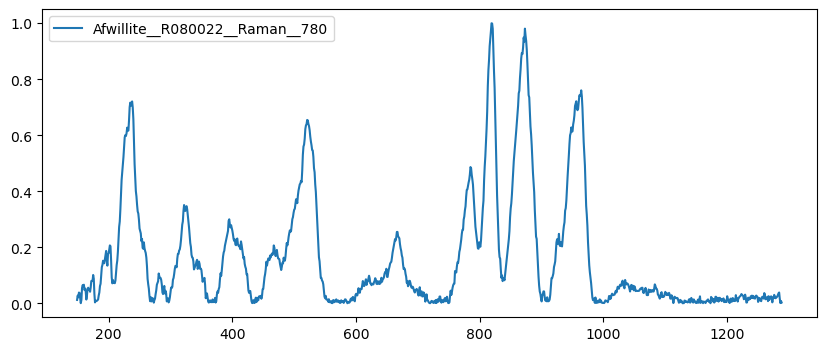

In [27]:
for i in unaccepted:
    S = np.copy(pr.lib()[i])
    S[1] = S[1]/(S[1].max())
    plt.figure(figsize=(10,4))
    plt.plot(S[0],S
    
    [1], label=i)
    plt.legend()
    plt.show()
    inp = input()
    if inp == 'q':
        break
    clear_output(wait=True)

# Copy selected spectra

In [13]:
dir = '../python_library/pyram/RamanLib/'

# EMPTY FOLDER
folder = dir + 'RRUFF_sub/'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

# COPY ACCEPTED FILES
for i in accepted:
    for j in os.listdir(dir+'RRUFF/'):
        if i==j[:len(i)]:
            shutil.copyfile(dir +'RRUFF/' + j, dir + 'RRUFF_sub/' + j)